<a href="https://colab.research.google.com/github/mahdizmni/Stochastic-Processes/blob/main/Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo


In [89]:
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import pandas as pd

Monte Carlo in 1 dimension

In [91]:
f = lambda x : np.cos(x) / (1 + x ** 2)
N = 1000000

w = np.random.uniform(0, 1, N)
I_N = sum(f(w)) / N
S_N = np.sqrt(sum((lambda x : f(x) ** 2)(w)) / N - I_N ** 2)

print(I_N, "\t", 3 * S_N / np.sqrt(N))

0.6828539178529018 	 0.0007071814912016902


$\hspace{2 cm} I_N \hspace{5 cm} 3S_N\sqrt{N}$

Monte Carlo in high (d) dimensions

In [ ]:
f = lambda x : np.cos(np.prod(x)) / (1 + sum(x ** 2))
d = 10
N = 1000000
w = np.random.uniform(0, 1, (d, N))
I_N = sum(f(w)) / N
S_N = np.sqrt(sum((lambda x : f(x) ** 2)(w)) / N - I_N ** 2)
print(I_N, "\t", 3 * S_N / np.sqrt(N))

0.24281792842301675 	 0.0001757963629993316


$\hspace{2 cm} I_N \hspace{5 cm} 3S_N\sqrt{N}$

Importance Sampling

Let sigma = $\int_{-∞}^{∞} \frac{f(x)^2}{g(x)} dx$

Estimated sigma:  117741.64426404942


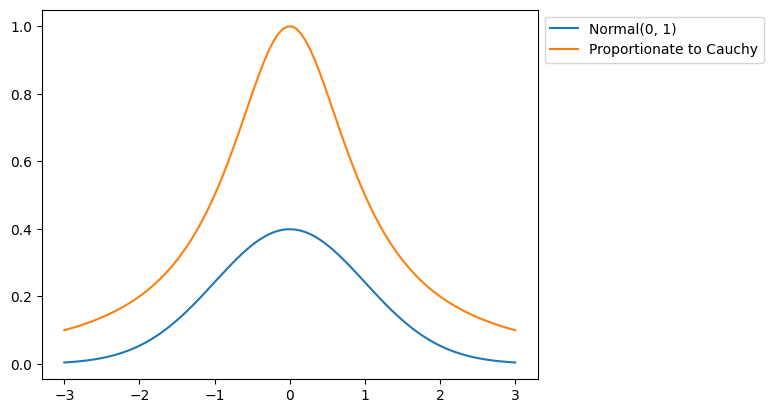

In [93]:
f = lambda x : 1 / (1 + x ** 2)
g = lambda x : norm.pdf(x, 0, 1)
N = 10000000

w = np.random.normal(0, 1, N)
hsigma = sum((lambda x : (f(x)/g(x)) ** 2)(w)) / N
print("Estimated sigma: ", hsigma)

x = np.linspace(-3, 3, 100)
plt.plot(x, g(x), label='Normal(0, 1)')
plt.plot(x, f(x), label='Proportionate to Cauchy')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

Rejection

0.608644311687089
0.8954710893661099
0.8931563739300153
0.8280208925725203
0.8382066369734182
0.41328196984436716
0.21308029751184454
0.13609749197219478
0.6952818052670053
0.668205512008441


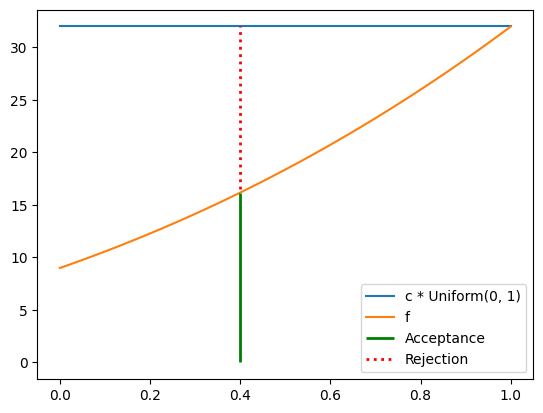

In [ ]:
f = lambda x : (x + 3) ** 2 * (x + 1)
c = 32
N = 10
s = 0.4         # Sample point for illustration of acceptance/rejection reigon

while N != 0:
  w = np.random.uniform(0, 1)             # Sampling from g
  t = np.random.uniform(0, 1) * c * uniform.pdf(w)
  if t <= f(w):
    print(w)
    N -= 1

x = np.linspace(0, 1, 100)
plt.plot(x, c * g(x), label='c * Uniform(0, 1)')
plt.plot(x, f(x), label='f')
plt.vlines(x=s, ymin=0, ymax=f(s), colors='green', lw=2, label='Acceptance')
plt.vlines(x=s, ymin=f(s) + 0.3, ymax=max(c * g(x)), colors='red', ls=':', lw=2, label='Rejection')
plt.legend(loc=4)
plt.show()